# Sentiment Analysis of Financial News Using NLTK

Data is scraped from CNBC, the Guardian, and Reuters official websites, the headlines in these datasets reflects the overview of the U.S. economy and stock market every day for the past year to 2 years.


Generally, the sentiment of financial news articles reflects and directs the performance of the U.S. stock market. Therefore, by applying Natural Language Processing (NLP) through these headlines, we can see how the positivity/negativity of the score through each day correlate to the stock market's gains/losses.


# About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)

Dataset is taken from Kaggle - https://www.kaggle.com/datasets/notlucasp/financial-news-headlines

# Columns Provided in the Dataset

Cnbc headlines
1. Time
2. Headlines
3. Description

Guardian headline
1. Time
2. Headline

Reuters headline
1. Time
2. Headline
3. Description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [1]:
# Import all the required libraries 

import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import stopwords and text processing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#import machine learning libraries
import sklearn



# Basic EDA on cnbc_headlines dataset

In [3]:
# Read csv file of cnbc headlines using pandas

cnbc = pd.read_csv('../input/financial-news-headlines/cnbc_headlines.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/financial-news-headlines/cnbc_headlines.csv'

In [ ]:
cnbc.head()

In [5]:
# check the shape of cnbc headline dataset
cnbc.shape

(3080, 3)

In [6]:
# Checking all the columns in the cnbc headline dataset

cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [7]:
# Check which columns are having categorical, numerical or boolean values

cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [8]:
# Check for missing values in all the columnns of cnbc headline dataset

cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time. As we cannot impute missing values since each headline can be unique and it is not correct to assume ourselves and impute the values

In [9]:
 # drop nan values in cnbc headline dataset
cnbc.dropna(inplace=True)

In [10]:
cnbc.reset_index(inplace=True, drop=True)

In [11]:
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2795,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2796,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2797,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2798,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [12]:
cnbc.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

> There are no missing values now in the datset

In [13]:
# checking whether duplicate records are present

dup_list = list(cnbc.duplicated(keep='first').values)
dup_list.count(True)

0

> There are no duplicate records in the dataset

In [14]:
# drop the duplicate rows in the dataset keep the first one
cnbc.drop_duplicates(keep='first', inplace=True)

In [15]:
# check the shape of cnbc headline dataset
cnbc.shape

(2800, 3)

# Basic EDA on Guardian headlines dataset

In [16]:
# Read csv file of guardian headlines using pandas

guard_data = pd.read_csv('../input/financial-news-headlines/guardian_headlines.csv')

In [17]:
guard_data.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [18]:
#check the shape of gaurdian headline dataset
guard_data.shape

(17800, 2)

In [19]:
#check columns of gaurdian headline
guard_data.columns

Index(['Time', 'Headlines'], dtype='object')

In [20]:
# Check which columns are having categorical, numerical or boolean values
guard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [21]:
# check null values in gaurdian headlines dataset
guard_data.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [22]:
# drop duplicate rows in headlines and keep the first one
guard_data.drop_duplicates(keep='first', inplace=True)
guard_data

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


> There are no missing records and duplicate records in the dataset

# Basic EDA on reuters headlines

In [23]:
# Read csv file of reuters headlines using using pandas

reuters = pd.read_csv('../input/financial-news-headlines/reuters_headlines.csv')

In [24]:
reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [25]:
#check the shape of reuters headlines dataset
reuters.shape

(32770, 3)

In [26]:
#check the columns of reuters headline dataset
reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [27]:
# Check which columns are having categorical, numerical or boolean values
reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [28]:
# Check for missing values in all the columnns of reuters headlines dataset

reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [29]:
#drop the duplicate rows in reuters headlines dataset and keep the first one

reuters.drop_duplicates(keep='first', inplace=True)
reuters

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [30]:
reuters.reset_index(drop=True, inplace=True)

1. There are no missing values in the dataset
2. There are 55 duplicate records in the dataset, which is removed 

## Supporting functions for further data processing and Modelling

### Preprocessing 

In [31]:
# creating a function for preprocessing 

def preprocessing_text(data):

    #convert all to lowercase
    data = data.lower()


    #removing puntuations
    data = re.sub(r'[^\w\s]','', data, flags=re.MULTILINE)


    #remove stopwords
    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords]
  

    #stemming
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]
    

    #lemmitizing
    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]
 
    return " ".join(lem_words)
  

### SENTIMENT ANAYSIS

Our dataset doesn't have a label/target. So to add a label to the dataset, we will use `SentimentIntensityAnalyzer` from NLTK library which assigns polarity intensity scores for given string based on lexical meaning of the text.

Refer to article for more info - https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [32]:
# import sentiment intensity analyzer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [33]:
# fuction to  decide sentiment as positive, negative and neutral

def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):
    
    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))
    
    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
    
    # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(mapper)
    
    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)
    
    return df


# Now working with description on datasets

In [34]:
# concatenate cnbc headlines dataset and reuters headline dataset

cnbc_reuters = pd.concat([cnbc, reuters], axis=0)

In [35]:
#check the shape of this new dataset

cnbc_reuters.shape

(35515, 3)

In [36]:
#make a copy of new dataset 

cnbc_reu = cnbc_reuters.copy()

In [37]:
# apply preprocessing to the description of new dataset

cnbc_reu['Description'] = cnbc_reu['Description'].apply(preprocessing_text)
cnbc_reu

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...
...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...


In [38]:
# apply the function  which decides sentiment to  polarity score column

df = sentiment_analysis(cnbc_reu, 'Description')
df

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative
...,...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


**In above we added the target column which has 3 classes (Positive, Negative, Neutral) to the dataset** 

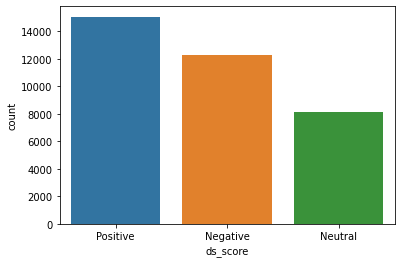

In [39]:
# plot a count plot on description score column

sns.countplot(x='ds_score', data=df);

In the description 

there are approximately

15000 positive statment

12000 negative statment

8000 neutral statment

In [40]:
df['ds_score'].value_counts()

Positive    15067
Negative    12279
Neutral      8169
Name: ds_score, dtype: int64

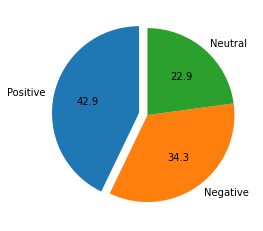

In [41]:
# pie chart on description score column

plt.pie([15000, 12000, 8000], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

In the dataset 

description contains

42.9% positive statments

34.3% negtive statements

22.9% neutral statments

# Modelling on description based dataset 

In [42]:
# split the dataset  into test and train 

from sklearn.model_selection import train_test_split

X = df['Description']
y = df.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31963,) (3552,) (31963,) (3552,)


Let's try to apply some of known Machine learning classification algorithms and compare their performances

### LINEAR SUPPORT VECTOR MACHINE


In [43]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score


# Fit the pipeline to the data
lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.932713963963964
Confusion matrix:  [[1123   45   71]
 [  22  762   20]
 [  50   31 1428]]
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.92      1239
     Neutral       0.91      0.95      0.93       804
    Positive       0.94      0.95      0.94      1509

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552

CPU times: user 1.9 s, sys: 101 ms, total: 2 s
Wall time: 1.89 s


### LOGISTIC REGRESSION


In [44]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression


# Fit the pipeline to the data
log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_ds.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_ds.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))
 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


MODEL: LOGISTIC REGRESSION
accuarcy score:  0.892454954954955
Confusion matrix:  [[1054   78  107]
 [  39  729   36]
 [  74   48 1387]]
              precision    recall  f1-score   support

    Negative       0.90      0.85      0.88      1239
     Neutral       0.85      0.91      0.88       804
    Positive       0.91      0.92      0.91      1509

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.89      0.89      0.89      3552

CPU times: user 15.8 s, sys: 17.4 s, total: 33.2 s
Wall time: 9.31 s


### MULTINOMIAL NAIVE BAYES


In [45]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
 
from sklearn.naive_bayes import MultinomialNB


# Fit the pipeline to the data
multi_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_ds.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))
 

MODEL: Multinomial NB
accuarcy score:  0.6396396396396397
Confusion matrix:  [[ 808    8  423]
 [ 150   86  568]
 [ 128    3 1378]]
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.70      1239
     Neutral       0.89      0.11      0.19       804
    Positive       0.58      0.91      0.71      1509

    accuracy                           0.64      3552
   macro avg       0.74      0.56      0.53      3552
weighted avg       0.71      0.64      0.59      3552

CPU times: user 972 ms, sys: 8.68 ms, total: 980 ms
Wall time: 981 ms


### BERNOULLI NAIVE BAYES


In [46]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

from sklearn.naive_bayes import BernoulliNB


# Fit the pipeline to the data
bern_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_ds.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))


MODEL: Bernoulli's NB
accuarcy score:  0.7395833333333334
Confusion matrix:  [[ 919   56  264]
 [ 135  480  189]
 [ 210   71 1228]]
              precision    recall  f1-score   support

    Negative       0.73      0.74      0.73      1239
     Neutral       0.79      0.60      0.68       804
    Positive       0.73      0.81      0.77      1509

    accuracy                           0.74      3552
   macro avg       0.75      0.72      0.73      3552
weighted avg       0.74      0.74      0.74      3552

CPU times: user 968 ms, sys: 3.86 ms, total: 972 ms
Wall time: 971 ms


### GRADIENT BOOSTING CLASSIFICATION MODEL


In [47]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier


# Fit the pipeline to the data
grad_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_ds.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_ds.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))


MODEL: Gradient Boosting
accuarcy score:  0.8386824324324325
Confusion matrix:  [[ 902  168  169]
 [  11  784    9]
 [  69  147 1293]]
              precision    recall  f1-score   support

    Negative       0.92      0.73      0.81      1239
     Neutral       0.71      0.98      0.82       804
    Positive       0.88      0.86      0.87      1509

    accuracy                           0.84      3552
   macro avg       0.84      0.85      0.83      3552
weighted avg       0.86      0.84      0.84      3552

CPU times: user 1min 13s, sys: 28.4 ms, total: 1min 13s
Wall time: 1min 13s


### XGBOOST CLASSIFICATION MODEL


In [48]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))


MODEL: XG Boost
accuarcy score:  0.8856981981981982
Confusion matrix:  [[ 996  128  115]
 [  12  785    7]
 [  53   91 1365]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1239
           1       0.78      0.98      0.87       804
           2       0.92      0.90      0.91      1509

    accuracy                           0.89      3552
   macro avg       0.88      0.89      0.88      3552
weighted avg       0.89      0.89      0.89      3552

CPU times: user 2min 50s, sys: 113 ms, total: 2min 50s
Wall time: 43.9 s


### Metrics comparison for above models (performance measurement)

In [49]:
# helper function for comparing models matric

def metrics_comparison(model_objects, model_names, X_test, y_test, enc_test):
    
    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names
   
    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(X_test)) if model != xg_boost_ds else accuracy_score(enc_test, model.predict(X_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else precision_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else recall_score(enc_test, model.predict(X_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else f1_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    
    return metrics_df

In [50]:
# list of model objects
model_objects = [lin_svc_ds, log_reg_ds, multi_nb_ds, bern_nb_ds, grad_boost_ds, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# print the comparison of models
met_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_df


,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.932714,0.933004,0.932714,0.932659
1,LogRegression,0.892455,0.893161,0.892455,0.892327
2,MultinomialNB,0.639640,0.707324,0.639640,0.587574
3,BernoulliNB,0.739583,0.742950,0.739583,0.737226
4,GradientBoost,0.838682,0.855298,0.838682,0.838493
5,XGBoost,0.885698,0.894402,0.885698,0.885774


> From above metrics comparison, we could confirm that Linear SVC model performs better than all other models

# working with test dataset

In [51]:
# Perforn the prediction on the test dataset
pred = lin_svc_ds.predict(X_test)
pred

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [52]:
# creating a dataframe of predicted results 
pred = pd.DataFrame(pred, columns=['predictions'])

In [53]:
pred

,predictions
0,Negative
1,Positive
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


After working alone with description, we could get above performance from the respective alogrithms.

Now we will try to increase our text content by concatenating headlines and description column and training the models on the combined data 

# Now working with headlines + description

In [54]:
# merge headlines and description of new dataset and name it info

cnbc_reu['info'] = cnbc_reu['Headlines'] + ' ' + cnbc_reu['Description']
cnbc_reu.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative,Wall Street delivered the 'kind of pullback I'...


In [55]:
# keeping info and time column, drop all remaining columns

cnbc_new = cnbc_reu.drop(['Headlines', 'Description', 'ds_score'], axis=1)
cnbc_new.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [56]:
# apply preprocessing on info column
 
cnbc_new['info'] = cnbc_new['info'].apply(preprocessing_text)
cnbc_new

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
...,...,...
32710,Mar 20 2018,malaysia say never hire british data firm cent...
32711,Mar 20 2018,prosecutor search volkswagen headquart new emi...
32712,Mar 20 2018,mcdonald set greenhous ga reduct target mcdona...
32713,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...


In [57]:
# apply the function  which decides sentiment to  polarity score column

cnbc_new = sentiment_analysis(cnbc_new, 'info')
cnbc_new

,Time,info,ds_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...,Negative
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32710,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32711,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32712,Mar 20 2018,mcdonald set greenhous ga reduct target mcdona...,Negative
32713,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


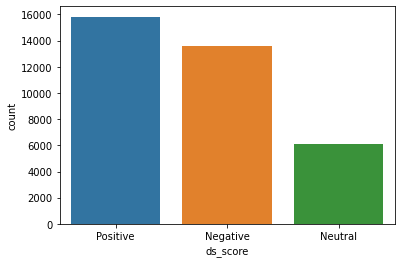

In [58]:
# perform count plot on info_score column

sns.countplot(x='ds_score', data=cnbc_new);

In the info

there are approx

15900 positive statment

13500 negative statment

6000 neutral statment

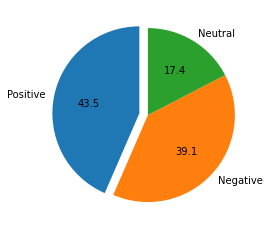

In [59]:
# perform pie chart on info_score column

plt.pie([15000, 13500, 6000], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

In the dataset

info contains

43.5% positive statments

39.1% negtive statements

17.4% neutral statments

# modeling on headlines + description

In [60]:
# split the dataset  into test and train 


X = cnbc_new['info']
y = cnbc_new.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31963,) (3552,) (31963,) (3552,)


### LINEAR SUPPORT VECTOR MACHINE


In [61]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipeline to the data
lin_svc_info = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_info.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_info.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))


MODEL: LINEAR SVC
accuarcy score:  0.901463963963964
Confusion matrix:  [[1212   45   91]
 [  40  502   52]
 [  73   49 1488]]
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      1348
     Neutral       0.84      0.85      0.84       594
    Positive       0.91      0.92      0.92      1610

    accuracy                           0.90      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.90      0.90      3552

CPU times: user 2.24 s, sys: 83.9 ms, total: 2.32 s
Wall time: 2.23 s


### LOGISTIC REGRESSION


In [62]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression


# Fit the pipeline to the data
log_reg_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_info.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_info.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))
 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


MODEL: LOGISTIC REGRESSION
accuarcy score:  0.8693693693693694
Confusion matrix:  [[1187   48  113]
 [  78  432   84]
 [  92   49 1469]]
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      1348
     Neutral       0.82      0.73      0.77       594
    Positive       0.88      0.91      0.90      1610

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: user 18.3 s, sys: 22 s, total: 40.3 s
Wall time: 11.1 s


### MULTINOMIAL NAIVE BAYES


In [63]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data
multi_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_info.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))
 

MODEL: Multinomial NB
accuarcy score:  0.6697635135135135
Confusion matrix:  [[ 958    0  390]
 [ 160   13  421]
 [ 202    0 1408]]
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72      1348
     Neutral       1.00      0.02      0.04       594
    Positive       0.63      0.87      0.74      1610

    accuracy                           0.67      3552
   macro avg       0.79      0.54      0.50      3552
weighted avg       0.73      0.67      0.61      3552

CPU times: user 1.15 s, sys: 9.1 ms, total: 1.16 s
Wall time: 1.16 s


### BERNOULLI NAIVE BAYES


In [64]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

# Fit the pipeline to the data
bern_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_info.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))
 

MODEL: Bernoulli's NB
accuarcy score:  0.7212837837837838
Confusion matrix:  [[1007   47  294]
 [ 137  285  172]
 [ 269   71 1270]]
              precision    recall  f1-score   support

    Negative       0.71      0.75      0.73      1348
     Neutral       0.71      0.48      0.57       594
    Positive       0.73      0.79      0.76      1610

    accuracy                           0.72      3552
   macro avg       0.72      0.67      0.69      3552
weighted avg       0.72      0.72      0.72      3552

CPU times: user 1.16 s, sys: 5.4 ms, total: 1.17 s
Wall time: 1.17 s


#### GRADIENT BOOSTING CLASSIFICATION MODEL


In [65]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

# Fit the pipeline to the data
grad_boost_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_info.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_info.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

 

MODEL: Gradient Boosting
accuarcy score:  0.7218468468468469
Confusion matrix:  [[ 987   26  335]
 [   4  106  484]
 [ 117   22 1471]]
              precision    recall  f1-score   support

    Negative       0.89      0.73      0.80      1348
     Neutral       0.69      0.18      0.28       594
    Positive       0.64      0.91      0.75      1610

    accuracy                           0.72      3552
   macro avg       0.74      0.61      0.61      3552
weighted avg       0.74      0.72      0.69      3552

CPU times: user 1min 22s, sys: 15.7 ms, total: 1min 22s
Wall time: 1min 22s


### XGBOOST CLASSIFICATION MODEL


In [66]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))


MODEL: XG Boost
accuarcy score:  0.8848536036036037
Confusion matrix:  [[1117  106  125]
 [   3  585    6]
 [  96   73 1441]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1348
           1       0.77      0.98      0.86       594
           2       0.92      0.90      0.91      1610

    accuracy                           0.88      3552
   macro avg       0.87      0.90      0.88      3552
weighted avg       0.89      0.88      0.89      3552

CPU times: user 3min 11s, sys: 212 ms, total: 3min 11s
Wall time: 49.3 s


In [67]:
# Metrics comparison as we done before

model_objects = [lin_svc_info, log_reg_info, multi_nb_info, bern_nb_info, grad_boost_info, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# print the comparison of models
met_info_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_info_df

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.901464,0.901519,0.901464,0.901448
1,LogRegression,0.869369,0.868196,0.869369,0.868227
2,MultinomialNB,0.669764,0.730264,0.669764,0.613051
3,BernoulliNB,0.721284,0.720319,0.721284,0.716517
4,GradientBoost,0.721847,0.744326,0.721847,0.694347
5,XGBoost,0.884854,0.892150,0.884854,0.885271


### Observations

* Compared to description, model trained on both headlines and description has metrics/perfromance little lower than former one in case of Linear SVC model
* XG boost model performs well on both training set 

# working with test data

In [68]:
# Perforn the prediction on the test dataset

prediction = lin_svc_info.predict(X_test)
prediction

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [69]:
# creating a dataframe of predicted results 

preds = pd.DataFrame(prediction, columns=['predictions'])

In [70]:
preds

,predictions
0,Negative
1,Negative
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Neutral
3550,Positive


# Prediction

we can check the result on any real time news headlines or descriptions

Here I have used two fiancial news headlines and predicted its sentiment



In [71]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = lin_svc_ds.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [72]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = lin_svc_ds.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Conclusion & Next steps

* we conclude that using nltk it is easy to classify financial news and with more appropiate training data, we can improve the accuracy of model and also can improve by tuning the hyperparamters.
* Deploying model on web page and testing the model
